In [558]:
import pandas as pd
from glob import glob
import random
import Stemmer
import emoji
import re
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

from matplotlib.pyplot import xcorr
from num2words import num2words
from pandas.core.computation.expressions import evaluate
from scipy.stats import logistic


In [559]:
appos = {
    "aren't" : "are not",
    "can't" : "cannot",
    "couldn't" : "could not",
    "didn't" : "did not",
    "doesn't" : "does not",
    "don't" : "do not",
    "hadn't" : "had not",
    "hasn't" : "has not",
    "haven't" : "have not",
    "he'd" : "he would",
    "he'll" : "he will",
    "he's" : "he is",
    "how's" : "how is",
    "i'd" : "i would",
    "i'll" : "i will",
    "i'm" : "i am",
    "i've" : "i have",
    "isn't" : "is not",
    "it's" : "it is",
    "let's" : "let us",
    "mustn't" : "must not",
    "shan't" : "shall not",
    "she'd" : "she would",
    "she'll" : "she will",
    "she's" : "she is",
    "shouldn't" : "should not",
    "that's" : "that is",
    "there's" : "there is",
    "they'd" : "they would",
    "they'll" : "they will",
    "they're" : "they are",
    "they've" : "they have",
    "wasn't" : "was not",
    "we'd" : "we would",
    "we'll" : "we will",
    "we're" : "we are",
    "we've" : "we have",
    "weren't" : "were not",
    "what's" : "what is",
    "where's" : "where is",
    "who's" : "who is",
    "won't" : "will not",
    "wouldn't" : "would not",
    "you'd" : "you would",
    "you'll" : "you will",
    "you're" : "you are",
    "you've" : "you have",
    "y'all" : "you all",
}

stop_words = {
    "i", "a", "an", "the", "in", "on", "at", "to", 
    "and", "or", "but", "is", "am", "are", "was", 
    "it", "they", "this", "of", "for", "with", 
    "as", "by", "from", "that", "those", "these",
    
    "he", "she", "we", "you", "me", "him", "her", 
    "us", "them", "my", "your", "our", "their", 
    "do", "does", "did", "have", "has", "had", 
    "about", "above", "across", "after", "against", 
    "along", "among", "around", "behind", "below", 
    "beneath", "beside", "between", "beyond", 
    "despite", "during", "except", "into", "near", 
    "off", "over", "past", "through", "toward", 
    "under", "until", "up", "upon", "via", "within", 
    "without", "although", "because", "since", 
    "unless", "while", "where", "whether", "any", 
    "each", "every", "either", "neither", "some", 
    "such", "both", "few", "many", "several", "all", 
    "other", "same", "so", "too","when"
}

negation_words = {
    "not", "no", "never", "none", "nobody", "nothing", "nowhere",
    "neither", "nor", "without", "cannot", "can't", "couldn't",
    "didn't", "doesn't", "don't", "hadn't", "hasn't", "haven't",
    "isn't", "mightn't", "mustn't", "needn't", "oughtn't", "shan't",
    "shouldn't", "wasn't", "weren't", "won't", "wouldn't", "rarely",
    "scarcely", "hardly", "barely", "little", "few", "lack", "lacking",
    "deny", "denies", "denied", "denying", "refuse", "refuses",
    "refused", "refusing", "reject", "rejects", "rejected", "rejecting"
}

positive_words = {
    "good", "great", "excellent", "awesome", "amazing", "wonderful",
    "fantastic", "perfect", "outstanding", "superb", "brilliant", "fabulous",
    "terrific", "incredible", "lovely", "delightful", "joyful", "happy",
    "joy", "bliss", "ecstatic", "pleasure", "vibrant", "optimistic",
    "positive", "success", "victory", "triumph", "peace", "harmony",
    "gratitude", "thankful", "blessed", "lucky", "prosperous", "rewarding",
    "satisfying", "refreshing", "inspiring", "motivating", "encouraging",
    "kind", "generous", "compassionate", "honest", "trustworthy", "loyal",
    "creative", "innovative", "energetic", "vital", "healthy", "strong",
    "courageous", "bold", "confident", "resilient", "graceful", "elegant",
    "charming", "friendly", "welcoming", "supportive", "helpful", "heavenly",
    "divine", "magical", "serene", "calm", "relaxed", "bright", "shining",
    "glowing", "sparkling", "clean", "pure", "fresh", "new", "exciting",
    "thrilling", "adventurous", "fun", "playful", "humorous", "lighthearted",
    "smiling", "laughing", "cheerful", "jubilant", "celebratory", "festive",
    "colorful", "beautiful", "stunning", "gorgeous", "radiant", "dazzling",
    "admire", "cherish", "treasure", "love", "adore", "passion", "devotion","smilingfacewithhearteyes"
}

negative_words = {
    "bad", "terrible", "awful", "horrible", "worst", "disgusting",
    "hate", "loathe", "despise", "abhor", "ugly", "painful",
    "sad", "unhappy", "miserable", "depressed", "gloomy", "sorrow",
    "failure", "disaster", "mess", "broken", "damaged", "defective",
    "angry", "furious", "enraged", "annoyed", "irritated", "frustrated",
    "evil", "wicked", "cruel", "mean", "selfish", "greedy", "corrupt",
    "harmful", "dangerous", "toxic", "poisonous", "deadly", "violent",
    "stupid", "idiotic", "foolish", "ridiculous", "nonsense", "absurd",
    "boring", "dull", "tedious", "monotonous", "lame", "uninteresting",
    "weak", "frail", "feeble", "helpless", "hopeless", "useless",
    "scary", "frightening", "terrifying", "horrifying", "creepy",
    "lonely", "isolated", "abandoned", "rejected", "betrayed", "ignored",
    "stress", "anxiety", "fear", "panic", "dread", "worry",
    "disappointment", "regret", "shame", "guilt", "embarrassment", "humiliation",
    "problem", "issue", "mistake", "error", "flaw", "defect",
    "conflict", "fight", "argument", "quarrel", "dispute", "war",
    "polluted", "dirty", "filthy", "rotten", "decaying", "waste",
    "fake", "fraud", "lie", "cheat", "deceive", "manipulate",
    "sick", "ill", "pain", "ache", "suffering", "agony",
    "loss", "defeat", "collapse", "crash", "bankrupt", "ruin"
}

positive_emojis = {
    ":grinning_face:", ":beaming_face_with_smiling_eyes:", ":grinning_face_with_sweat:",
    ":rolling_on_the_floor_laughing:", ":face_with_tears_of_joy:", ":smiling_face:",
    ":smiling_face_with_halo:", ":smiling_face_with_hearts:", ":smiling_face_with_heart-eyes:",
    ":star-struck:", ":kissing_face:", ":kissing_face_with_closed_eyes:",
    ":kissing_face_with_smiling_eyes:", ":heart_eyes:", ":face_blowing_a_kiss:",
    ":hugging_face:", ":thumbs_up:", ":clapping_hands:", ":folded_hands:", ":handshake:",
    ":sparkles:", ":fire:", ":rocket:", ":party_popper:", ":confetti_ball:", ":tada:",
    ":balloon:", ":red_heart:", ":orange_heart:", ":yellow_heart:", ":green_heart:",
    ":blue_heart:", ":purple_heart:", ":sparkling_heart:", ":heart_with_arrow:",
    ":revolving_hearts:", ":two_hearts:", ":growing_heart:", ":heartpulse:",
    ":star:", ":glowing_star:", ":sun:", ":sun_with_face:", ":rainbow:", ":flower_playing_cards:",
    ":cherry_blossom:", ":rose:", ":hibiscus:", ":sunflower:", ":tulip:", ":bouquet:",
    ":palm_tree:", ":christmas_tree:", ":four_leaf_clover:", ":shamrock:", ":maple_leaf:",
    ":fallen_leaf:", ":herb:", ":potted_plant:", ":seedling:", ":crown:", ":trophy:",
    ":medal:", ":musical_notes:", ":musical_note:", ":party_face:", ":dancer:", ":man_dancing:",
    ":woman_dancing:", ":man_in_tuxedo:", ":princess:", ":superhero:", ":rocket:", ":airplane:",
    ":checkered_flag:", ":trophy:", ":1st_place_medal:", ":money_with_wings:", ":dollar_banknote:",
    ":money_bag:", ":gem_stone:", ":ring:", ":gift:", ":birthday_cake:", ":champagne:",
    ":clinking_glasses:", ":beers:", ":chocolate_bar:", ":ice_cream:", ":doughnut:",
    ":cookie:", ":cake:", ":pizza:", ":hamburger:", ":taco:", ":burrito:", ":sushi:",
    ":ramen:", ":spaghetti:", ":wine_glass:", ":hot_beverage:", ":teacup_without_handle:",
    ":beer_mug:", ":clinking_beer_mugs:", ":champagne_glass:", ":dog_face:", ":cat_face:",
    ":panda_face:", ":koala:", ":unicorn_face:", ":dragon_face:", ":dove:", ":butterfly:",
    ":rainbow_flag:", ":peace_symbol:", ":infinity:", ":recycling_symbol:", ":white_flower:",
}

negative_emojis = {
    ":angry_face:", ":pouting_face:", ":face_with_symbols_on_mouth:", ":smiling_face_with_horns:",
    ":angry_face_with_horns:", ":skull:", ":skull_and_crossbones:", ":crying_face:",
    ":loudly_crying_face:", ":worried_face:", ":slightly_frowning_face:", ":confounded_face:",
    ":disappointed_face:", ":downcast_face:", ":face_with_steam_from_nose:", ":face_screaming_in_fear:",
    ":fearful_face:", ":anxious_face_with_sweat:", ":sad_but_relieved_face:", ":sleepy_face:",
    ":tired_face:", ":yawning_face:", ":face_with_medical_mask:", ":nauseated_face:",
    ":face_vomiting:", ":sneezing_face:", ":cold_face:", ":hot_face:", ":dizzy_face:",
    ":exploding_head:", ":face_with_head-bandage:", ":broken_heart:", ":black_heart:",
    ":thumbs_down:", ":middle_finger:", ":raised_fist:", ":oncoming_fist:", ":collision:",
    ":bomb:", ":fire:", ":dagger:", ":pistol:", ":stop_sign:", ":no_entry:", ":prohibited:",
    ":warning:", ":radioactive:", ":biohazard:", ":anger_symbol:", ":hole:", ":pile_of_poo:",
    ":zombie:", ":ghost:", ":japanese_goblin:", ":japanese_ogre:", ":clown_face:",
    ":crying_cat_face:", ":pouting_cat_face:", ":see-no-evil_monkey:", ":hear-no-evil_monkey:",
    ":speak-no-evil_monkey:", ":footprints:", ":spider:", ":spider_web:", ":snake:", ":rat:",
    ":scorpion:", ":mosquito:", ":microbe:", ":coffin:", ":funeral_urn:", ":stopwatch:",
    ":hourglass_done:", ":hourglass_not_done:", ":cigarette:", ":no_smoking:", ":cactus:",
    ":wilted_flower:", ":volcano:", ":earthquake:", ":tornado:", ":cloud_with_lightning_and_rain:",
    ":droplet:", ":sweat_droplets:", ":dashing_away:", ":dizzy:", ":face_with_thermometer:",
    ":sick:", ":bandage:", ":syringe:", ":pill:", ":test_tube:", ":magnifying_glass_tilted_left:",
    ":chains:", ":handcuffs:", ":locked:", ":locked_with_key:", ":locked_with_pen:"
}

# Create Load Data Class

In [560]:
class DataLoder:
    def __init__(self,path:str,labels:list[str],shuffle:bool=True):
        self.path = path
        self.labels = labels
        self.shuffle = shuffle
    
    def load_data(self)->pd.DataFrame:
        data=[]
        for label in self.labels:
            for filename in glob(f"{self.path}/{label}/*.txt"):
                with open(filename, "r", encoding="utf-8") as file:
                    text = file.read()
                    data.append({"text":text,"sentiment_label":label})
        if self.shuffle:
            random.shuffle(data)
        df = pd.DataFrame(data)
        return df

In [561]:
data_load=DataLoder("data/training_data",labels=["neg","pos"],shuffle=True)
sentiment_data=data_load.load_data()
sentiment_data.head(5)

,text,sentiment_label
0,silly performances and some huge gaps in logic...,neg
1,a hotshot lawyer gets an obviously guilty chil...,neg
2,"when i first heard about scream in 1996 , i wa...",pos
3,at one point during brian de palma's crime epi...,pos
4,to watch `battlefield earth' is to wallow in m...,neg


# Create Preprocessing Classes

In [562]:
class FeaturesExtractor(ABC):
    @abstractmethod
    def transform(self,text:str):
        pass

class Preprocessing(ABC):
    @abstractmethod
    def transform(self,text:str)->str:
        pass

In [563]:
class NegationCount(FeaturesExtractor):
    def transform(self,text:str):
        text=text.lower()
        tokens=text.split()
        counter=0
        for token in tokens:
            if token in negation_words:
                counter+=1
        return {
            "neg_word_count":counter
        }

class IngCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token.endswith("ing"):
                counter+=1
        return {"ing_word_count":counter}

class EdCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token.endswith("ed"):
                counter+=1
        return {"ed_word_count":counter}

class PositiveWordCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token in positive_words:
                counter+=1
        return {"positive_word_count":counter}
            
class NegativeWordsCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token in negative_words:
                counter+=1
        return {"negative_word_count":counter}

class PositiveEmojiCount(FeaturesExtractor):
    def transform(self,text:str):
        text=ConvertEmoji().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token.startswith(":") and token.endswith(":") and token in positive_emojis:
                counter+=1
        return {"positive_emoji_count":counter}

class NegativeEmojiCount(FeaturesExtractor):
    def transform(self,text:str):
        text=ConvertEmoji().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token.startswith(":") and token.endswith(":") and token in negative_emojis:
                counter+=1
        return {"negative_emoji_count":counter}

class WordCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        return {"word_count":len(tokens)}

class AverageWordLength(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        tokens_size=len(tokens)
        word_sum=0
        for token in tokens:
            word_sum+=len(token)
        avg=word_sum/tokens_size
        return {"avg_word_length":avg}

class UniqueWordRatio(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        word_size=len(tokens)
        unique_word_size=len(set(tokens))
        ratio=unique_word_size/word_size if word_size > 0 else 0
        return {"unique_word_ratio":ratio}

class ExclamationCount(FeaturesExtractor):
    def transform(self,text:str):
        return {"exclamation_count":text.count("!")}

class QuestionCount(FeaturesExtractor):
    def transform(self,text:str):
        return {"question_count":text.count("?")}

class EllipsisCount(FeaturesExtractor):
    def transform(self,text:str):
        ellipsis_count = len(re.findall(r"\.\.\.", text))
        return {"ellipsis_count":ellipsis_count}
    
class CapitalizedRatio(FeaturesExtractor):
    def transform(self,text:str):
        tokens=text.split()
        word_size=len(tokens)
        capitalized_words = [word for word in tokens if word.isupper() and len(word) > 1]
        ratio = len(capitalized_words)/word_size if word_size > 0 else 0
        return {"capitalized_ratio":ratio}
    
class RepeatedLettersCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        repeated_letters = re.findall(r'(\w)\1{2,}', text)
        return {"repeated_letters_count":len(repeated_letters)}

In [564]:
class RemoveSpecialCharacters(Preprocessing):
    def transform(self,text:str)->str:
        text=text.lower()
        process_text = re.sub(r"[^a-zA-Z0-9'\s]", '', text)
        process_text = re.sub(r"\s+", " ", process_text)
        return process_text

class ConvertEmoji(Preprocessing):    
    def transform(self,text:str)->str:
        text=text.lower()
        converted_text = emoji.demojize(text)
        return converted_text

class TextStemmer(Preprocessing):
    def transform(self,text:str)->str:
        text=text.lower()
        tokens=text.split()
        stemmer=Stemmer.Stemmer("english")
        tokens=[stemmer.stemWord(token) for token in tokens]
        return ' '.join(tokens)
    
class ConvertNumberToWords(Preprocessing):
    def transform(self,text:str)->str:
        text=text.lower()
        def replace_match(match):
            return num2words(int(match.group(0)), to='ordinal')
        return re.sub(r'-?\d+',replace_match,text)
        
class NegationHandling(Preprocessing):
    def transform(self,text:str)->str:
        text=text.lower()
        tokens=text.split()
        tokens=[appos[word] if word in appos else word for word in tokens]
        return ' '.join(tokens)

class RemoveStopWords(Preprocessing):
    def transform(self,text:str)->str:
        text=text.lower()
        tokens=text.split()
        tokens=[word for word in tokens if word not in stop_words]
        return ' '.join(tokens)

In [565]:
class Pipeline(ABC):
    @abstractmethod
    def transform(self,text:str):
        pass

In [566]:
class PreprocessingPipeline(Pipeline):
    def __init__(self,pipeline_list:list[Preprocessing]):
        self.pipeline_list = pipeline_list
    
    def transform(self,text:str):
        for pipeline in self.pipeline_list:
            text = pipeline.transform(text)
        
        return text

In [567]:
class FeaturesExtractorPipeline(Pipeline):
    def __init__(self,pipeline_list:list[FeaturesExtractor]):
        self.pipeline_list = pipeline_list
    
    def transform(self,text:str):
        dictionary ={}
        for pipeline in self.pipeline_list:
            dictionary.update(pipeline.transform(text))
        return dictionary            
            

In [568]:
string="100 I love this product! 😍 It's absolutely amazing. But the delivery? was slow... BUT 😠 sooooo"
preprocessing_pipeline=PreprocessingPipeline([
    NegationHandling(),
    TextStemmer(),
    ConvertEmoji(),
    RemoveSpecialCharacters(),
    ConvertNumberToWords(),
    RemoveStopWords()
])
features_extractor_pipeline=FeaturesExtractorPipeline([
    NegationCount(),
    IngCount(),
    EdCount(),
    PositiveWordCount(),
    NegativeWordsCount(),
    PositiveEmojiCount(),
    NegativeEmojiCount(),
    WordCount(),
    AverageWordLength(),
    UniqueWordRatio(),
    ExclamationCount(),
    QuestionCount(),
    EllipsisCount(),
    CapitalizedRatio(),
    RepeatedLettersCount(),
])
print(preprocessing_pipeline.transform(string))
print(features_extractor_pipeline.transform(string))

one hundredth love product smilingfacewithhearteyes absolut amazing delivery slow angryface sooooo
{'neg_word_count': 0, 'ing_word_count': 1, 'ed_word_count': 0, 'positive_word_count': 2, 'negative_word_count': 0, 'positive_emoji_count': 1, 'negative_emoji_count': 1, 'word_count': 15, 'avg_word_length': 4.666666666666667, 'unique_word_ratio': 0.9333333333333333, 'exclamation_count': 1, 'question_count': 1, 'ellipsis_count': 1, 'capitalized_ratio': 0.058823529411764705, 'repeated_letters_count': 1}


In [569]:
def extract_features(text:str):
    features=features_extractor_pipeline.transform(text)
    return features

expanded=sentiment_data["text"].apply(extract_features).apply(pd.Series)
sentiment_data=sentiment_data.join(expanded)
sentiment_data.head(5)

,text,sentiment_label,neg_word_count,ing_word_count,ed_word_count,positive_word_count,negative_word_count,positive_emoji_count,negative_emoji_count,word_count,avg_word_length,unique_word_ratio,exclamation_count,question_count,ellipsis_count,capitalized_ratio,repeated_letters_count
0,silly performances and some huge gaps in logic...,neg,2.0,6.0,5.0,1.0,0.0,0.0,0.0,290.0,4.503448,0.606897,0.0,2.0,0.0,0.0,0.0
1,a hotshot lawyer gets an obviously guilty chil...,neg,18.0,41.0,19.0,8.0,9.0,0.0,0.0,926.0,4.396328,0.444924,1.0,4.0,0.0,0.0,0.0
2,"when i first heard about scream in 1996 , i wa...",pos,14.0,17.0,16.0,11.0,8.0,0.0,0.0,655.0,4.575573,0.490076,0.0,1.0,0.0,0.0,0.0
3,at one point during brian de palma's crime epi...,pos,10.0,20.0,9.0,8.0,5.0,0.0,0.0,603.0,4.655058,0.578773,0.0,1.0,0.0,0.0,0.0
4,to watch `battlefield earth' is to wallow in m...,neg,8.0,28.0,22.0,2.0,2.0,0.0,0.0,661.0,4.904690,0.582451,1.0,5.0,0.0,0.0,1.0


In [570]:
def text_preprocessing(text:str):
    preprocessed_text=preprocessing_pipeline.transform(text)
    return preprocessed_text

sentiment_data["text"]=sentiment_data["text"].apply(text_preprocessing)
sentiment_data.head(5)

,text,sentiment_label,neg_word_count,ing_word_count,ed_word_count,positive_word_count,negative_word_count,positive_emoji_count,negative_emoji_count,word_count,avg_word_length,unique_word_ratio,exclamation_count,question_count,ellipsis_count,capitalized_ratio,repeated_letters_count
0,silli perform huge gap logic mar otherwis inte...,neg,2.0,6.0,5.0,1.0,0.0,0.0,0.0,290.0,4.503448,0.606897,0.0,2.0,0.0,0.0,0.0
1,hotshot lawyer get obvious guilti child molest...,neg,18.0,41.0,19.0,8.0,9.0,0.0,0.0,926.0,4.396328,0.444924,1.0,4.0,0.0,0.0,0.0
2,"first heard scream one thousand, nine hundred ...",pos,14.0,17.0,16.0,11.0,8.0,0.0,0.0,655.0,4.575573,0.490076,0.0,1.0,0.0,0.0,0.0
3,one point dure brian de palma crime epic scarf...,pos,10.0,20.0,9.0,8.0,5.0,0.0,0.0,603.0,4.655058,0.578773,0.0,1.0,0.0,0.0,0.0
4,watch battlefield earth wallow miseri one most...,neg,8.0,28.0,22.0,2.0,2.0,0.0,0.0,661.0,4.904690,0.582451,1.0,5.0,0.0,0.0,1.0


# Create Visualize Data classes

In [571]:
class Visualize(ABC):
    def visualize(self):
        pass

In [572]:
class BarVisualize(Visualize):
    def __init__(self, x, y, title='Bar Plot', x_label='X Axis', y_label='Y Axis', color='blue', figsize=(8, 6), grid=True, ):
        self.x=x
        self.y=y
        self.title=title
        self.x_label=x_label
        self.y_label=y_label
        self.figsize=figsize
        self.grid=grid
        self.color=color
    
    def visualize(self):
        if len(self.x)!=len(self.y):
             raise ValueError("x and y must have the same length")
        fig, ax = plt.subplots(figsize=self.figsize)
        ax.bar(self.x, self.y, color=self.color)
        
        ax.set_title(self.title)
        ax.set_xlabel(self.x_label)
        ax.set_ylabel(self.y_label)
        ax.grid(self.grid)
        plt.show()

In [573]:
data_sum=sentiment_data.groupby('sentiment_label').sum()
data_sum

,text,neg_word_count,ing_word_count,ed_word_count,positive_word_count,negative_word_count,positive_emoji_count,negative_emoji_count,word_count,avg_word_length,unique_word_ratio,exclamation_count,question_count,ellipsis_count,capitalized_ratio,repeated_letters_count
sentiment_label,,,,,,,,,,,,,,,,
neg,silli perform huge gap logic mar otherwis inte...,9217.0,17517.0,12630.0,4047.0,4511.0,0.0,0.0,516003.0,3922.928998,472.676071,888.0,1865.0,0.0,0.0,282.0
pos,"first heard scream one thousand, nine hundred ...",8160.0,18288.0,13391.0,6063.0,2910.0,0.0,0.0,558036.0,3761.511554,432.477854,524.0,1294.0,0.0,0.0,185.0


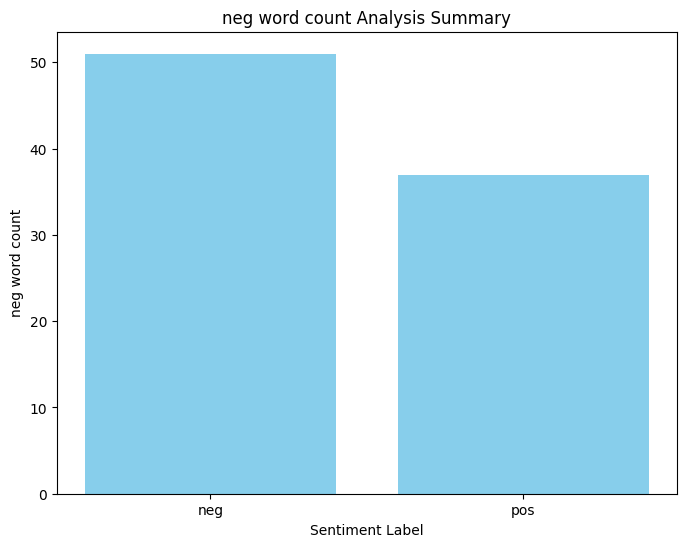

In [574]:
visualize=BarVisualize(sentiment_data['sentiment_label'],sentiment_data['neg_word_count'],
                       y_label="neg word count",x_label="Sentiment Label",color='skyblue',
                       title='neg word count Analysis Summary',grid=False)
visualize.visualize()

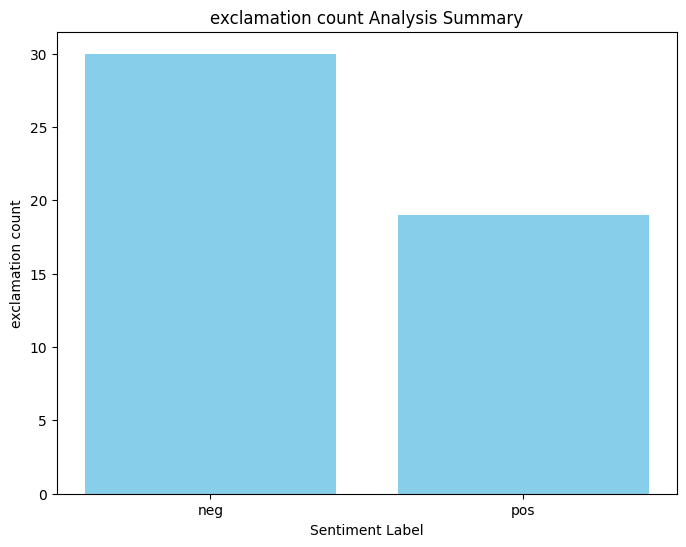

In [575]:
visualize=BarVisualize(sentiment_data['sentiment_label'],sentiment_data['exclamation_count'],
                       y_label="exclamation count",x_label="Sentiment Label",color='skyblue',
                       title='exclamation count Analysis Summary',grid=False)
visualize.visualize()

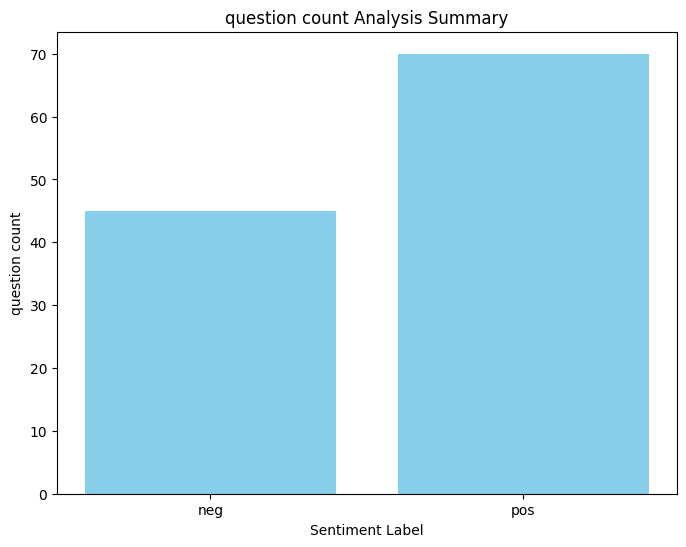

In [576]:
visualize=BarVisualize(sentiment_data['sentiment_label'],sentiment_data['question_count'],
                       y_label="question count",x_label="Sentiment Label",color='skyblue',
                       title='question count Analysis Summary',grid=False)
visualize.visualize()

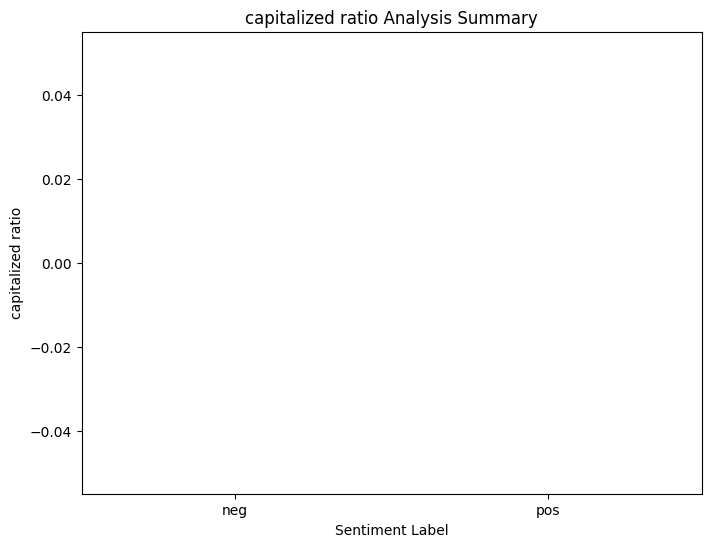

In [577]:
visualize=BarVisualize(sentiment_data['sentiment_label'],sentiment_data['capitalized_ratio'],
                       y_label="capitalized ratio",x_label="Sentiment Label",color='skyblue',
                       title='capitalized ratio Analysis Summary',grid=False)
visualize.visualize()

# Feature Representation and Engineering

In [578]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [579]:
class Vectorizer(ABC):
    def transform(self):
        pass

In [580]:
class TFIDFVectorizer(Vectorizer):
    def __init__(self,dataframe:pd.DataFrame,prams):
        self.dataframe=dataframe
        self.prams=prams
        self.vectorizer=TfidfVectorizer(**prams)
    
    def transform(self):     
        tfidf_matrix = self.vectorizer.fit_transform(self.dataframe)
        return tfidf_matrix

In [581]:
vectorizer=TFIDFVectorizer(sentiment_data["text"],{"max_df":0.5,"min_df":2,"ngram_range":(1, 2),    
                            "max_features":8000,"use_idf":True,"smooth_idf":True})

tfidf_matrix=vectorizer.transform()

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.vectorizer.get_feature_names_out())

sentiment_data = pd.concat([sentiment_data, tfidf_df], axis=1)

In [582]:
import numpy as np

sentiment_data["sentiment_label"] = np.where(sentiment_data["sentiment_label"] == "pos", 1, 0)

In [583]:
sentiment_data=sentiment_data.drop(
    ["text","capitalized_ratio","ellipsis_count","ing_word_count","ed_word_count","positive_emoji_count",
     "negative_emoji_count"], axis=1)

### Model Training & Evaluation

In [584]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [586]:
class ModelTrain(ABC):
    def train(self):
        pass

class ModelEvaluate(ABC):
    def evaluate(self,model):
        pass

In [587]:
class GaussianNBTrain(ModelTrain):
    def __init__(self,X_train,y_train,priors=None,var_smoothing=1e-9):
        self.X_train=X_train
        self.y_train=y_train
        self.priors=priors
        self.var_smoothing=var_smoothing
        self.model=None
        
    def train(self):
        gnb = GaussianNB(priors=self.priors,var_smoothing=self.var_smoothing)
        gnb.fit(self.X_train,self.y_train)
        self.model=gnb
        return gnb

class SVCTrain(ModelTrain):
    def __init__(self,X_train,y_train,params):
        self.X_train=X_train
        self.y_train=y_train
        self.params=params
        self.model=None
    
    def train(self):
        svc=SVC(**self.params)
        svc.fit(self.X_train,self.y_train)
        self.model=svc
        return svc

class RandomForestTrain(ModelTrain):
    def __init__(self,X_train,y_train,params):
        self.X_train=X_train
        self.y_train=y_train
        self.params=params
        self.model=None
    
    def train(self):
        rf = RandomForestClassifier(**self.params)
        rf.fit(self.X_train,self.y_train)
        self.model=rf
        return rf

class LogisticRegressionTrain(ModelTrain):
    def __init__(self,X_train,y_train,params):
        self.X_train=X_train
        self.y_train=y_train
        self.params=params
        self.model=None
    
    def train(self):
        logreg = LogisticRegression(**self.params)
        logreg.fit(self.X_train,self.y_train)
        self.model=logreg
        return logreg

In [588]:
class AcuracyEvaluate(ModelEvaluate):
    def __init__(self,X_test,y_test):
        self.X_test=X_test
        self.y_test=y_test
    
    def evaluate(self,model):
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy

class PrecisionEvaluate(ModelEvaluate):
    def __init__(self,X_test,y_test):
        self.X_test=X_test
        self.y_test=y_test
    
    def evaluate(self,model):
        y_pred = model.predict(self.X_test)
        precision = precision_score(y_test, y_pred)
        return precision

class RecallEvaluate(ModelEvaluate):
    def __init__(self,X_test,y_test):
        self.X_test=X_test
        self.y_test=y_test
    
    def evaluate(self,model):
        y_pred = model.predict(self.X_test)
        recall = recall_score(y_test, y_pred)
        return recall

class F1Evaluate(ModelEvaluate):
    def __init__(self,X_test,y_test,default="binary"):
        self.X_test=X_test
        self.y_test=y_test
        self.default=default
    
    def evaluate(self,model):
        y_pred = model.predict(self.X_test)
        f1 = f1_score(y_test, y_pred, average=self.default)
        return f1

class KFoldEvaluate(ModelEvaluate):
    def __init__(self,X_train,y_train,scoring,params):
        self.X_train=X_train
        self.y_train=y_train
        self.scoring=scoring
        self.params=params
    
    def evaluate(self,model):
        k_fold = KFold(**self.params)
        cv_scores = cross_validate(model, self.X_train, self.y_train, cv=k_fold, scoring=self.scoring,return_train_score=True)
        return cv_scores

class CrossValidationEvaluate(ModelEvaluate):
    def __init__(self,X_train,y_train,scoring,params):
        self.X_train=X_train
        self.y_train=y_train
        self.scoring=scoring
        self.params=params
    
    def evaluate(self,model):
        k_fold = KFold(**self.params)
        cv_scores = cross_val_score(model, self.X_train, self.y_train, cv=k_fold, scoring=self.scoring)
        return cv_scores
        
class CompareAccuracyEvaluate(ModelEvaluate):
    def __init__(self,X_train,y_train,X_test,y_test):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
    
    def evaluate(self,model):
        train_evaluate = AcuracyEvaluate(self.X_train,self.y_train)
        test_evaluate = AcuracyEvaluate(self.X_test,self.y_test)
        
        train_accuracy = train_evaluate.evaluate(model)
        test_accuracy = test_evaluate.evaluate(model)
        
        if train_accuracy > test_accuracy:
            return 1
        elif train_accuracy < test_accuracy:
            return -1
        return 0

class ClassificationReportEvaluate(ModelEvaluate):
    def __init__(self,X_test,y_test):
        self.X_test=X_test
        self.y_test=y_test
    
    def evaluate(self,model):
        y_pred = model.predict(self.X_test)
        report = classification_report(self.y_test, y_pred)
        return report

In [589]:
class Printer(ABC):
    @abstractmethod
    def print(self):
        pass

In [590]:
class EvaluatePrinter(Printer):
    def __init__(self,model,X_train,y_train,X_test,y_test):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
        self.model=model

    def print(self):
        print(f"accuracy = {accuracy_evaluate.evaluate(self.model)}")
        print(f"precision = {precision_evaluate.evaluate(self.model)}")
        print(f"recall = {recall_evaluate.evaluate(self.model)}")
        print(f"f1 = {f1_evaluate.evaluate(self.model)}")
        
        compare_evaluate=CompareAccuracyEvaluate(self.X_train,self.y_train,self.X_test,self.y_test)
        compare_accuracy=compare_evaluate.evaluate(self.model)
        print("Compare Accuracy Evaluate:")
        if compare_accuracy == 1:
            print("Train Accuracy > Test Accuracy")
        elif compare_accuracy == -1:
            print("Train Accuracy < Test Accuracy")
        else:
            print("Train Accuracy == Test Accuracy")
        
        report_evaluate=ClassificationReportEvaluate(self.X_test,self.y_test)
        report=report_evaluate.evaluate(self.model)
        print("Classification Report")
        print(report)

class EvaluatePrinterScale(Printer):
    def __init__(self,model,X_train,y_train,X_test,y_test):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
        self.model=model

    def print(self):
        print(f"accuracy = {accuracy_evaluate_scale.evaluate(self.model)}")
        print(f"precision = {precision_evaluate_scale.evaluate(self.model)}")
        print(f"recall = {recall_evaluate_scale.evaluate(self.model)}")
        print(f"f1 = {f1_evaluate_scale.evaluate(self.model)}")
        
        compare_evaluate=CompareAccuracyEvaluate(self.X_train,self.y_train,self.X_test,self.y_test)
        compare_accuracy=compare_evaluate.evaluate(self.model)
        print("Compare Accuracy Evaluate:")
        if compare_accuracy == 1:
            print("Train Accuracy > Test Accuracy")
        elif compare_accuracy == -1:
            print("Train Accuracy < Test Accuracy")
        else:
            print("Train Accuracy == Test Accuracy")
        
        report_evaluate=ClassificationReportEvaluate(self.X_test,self.y_test)
        report=report_evaluate.evaluate(self.model)
        print("Classification Report")
        print(report)

In [591]:
class TrainingValidationPlot(Visualize):
    def __init__(self, cv_results):
        self.cv_results = cv_results
        
    def visualize(self):
        train_acc = self.cv_results['train_accuracy']
        val_acc = self.cv_results['test_accuracy']
        train_loss = -self.cv_results['train_neg_log_loss']
        val_loss = -self.cv_results['test_neg_log_loss']

        folds = np.arange(1, len(train_acc) + 1)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        ax1.plot(folds, train_acc, 
                 marker='o', linestyle='--', color='blue', label='Training Accuracy')
        ax1.plot(folds, val_acc, 
                 marker='s', linestyle='-', color='orange', label='Validation Accuracy')
        ax1.set_xlabel('Fold Number')
        ax1.set_ylabel('Accuracy')
        ax1.set_title('Accuracy Comparison Across Folds')
        ax1.legend()
        ax1.grid(True, linestyle='--', alpha=0.7)

        ax2.plot(folds, train_loss, 
                 marker='o', linestyle='--', color='blue', label='Training Loss')
        ax2.plot(folds, val_loss, 
                 marker='s', linestyle='-', color='orange', label='Validation Loss')
        ax2.set_xlabel('Fold Number')
        ax2.set_ylabel('Loss')
        ax2.set_title('Log Loss Comparison Across Folds')
        ax2.legend()
        ax2.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

In [592]:
from sklearn.model_selection import train_test_split

X_train, X_test= train_test_split(sentiment_data,test_size=0.2,random_state=42)

In [593]:
y_train=X_train["sentiment_label"]
y_test=X_test["sentiment_label"]
X_train=X_train.drop("sentiment_label",axis=1)
X_test=X_test.drop("sentiment_label",axis=1)

In [594]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [595]:
accuracy_evaluate=AcuracyEvaluate(X_test,y_test)
precision_evaluate=PrecisionEvaluate(X_test,y_test)
recall_evaluate=RecallEvaluate(X_test,y_test)
f1_evaluate=F1Evaluate(X_test,y_test)
k_fold=KFoldEvaluate(X_train,y_train,scoring=["accuracy", "neg_log_loss"],params={"n_splits" :10,
                        "shuffle" : True, "random_state" : 42})


cross_validation_evaluate = CrossValidationEvaluate(X_train,y_train,scoring="accuracy",
                                                    params={"n_splits" :10,"shuffle" : True, "random_state" : 42})


In [596]:
accuracy_evaluate_scale=AcuracyEvaluate(X_test_scaler,y_test)
precision_evaluate_scale=PrecisionEvaluate(X_test_scaler,y_test)
recall_evaluate_scale=RecallEvaluate(X_test_scaler,y_test)
f1_evaluate_scale=F1Evaluate(X_test_scaler,y_test)

k_fold_scale=KFoldEvaluate(X_train_scaler,y_train,scoring=["accuracy", "neg_log_loss"],params={"n_splits" :10,
                        "shuffle" : True, "random_state" : 42})

cross_validation_evaluate_scale = CrossValidationEvaluate(X_train_scaler,y_train,scoring="accuracy",
                                                    params={"n_splits" :10,"shuffle" : True, "random_state" : 42})

In [597]:
gnb=GaussianNBTrain(X_train,y_train)
gnb_model=gnb.train()

cross_validation=cross_validation_evaluate.evaluate(gnb_model)
print(f"Cross-Validation Accuracy Scores: {cross_validation}")
print(f"Mean Accuracy Scores: {cross_validation.mean()}")

Cross-Validation Accuracy Scores: [0.73684211 0.7593985  0.7593985  0.77272727 0.70454545 0.73484848
 0.71969697 0.75757576 0.71212121 0.68181818]
Mean Accuracy Scores: 0.7338972431077695


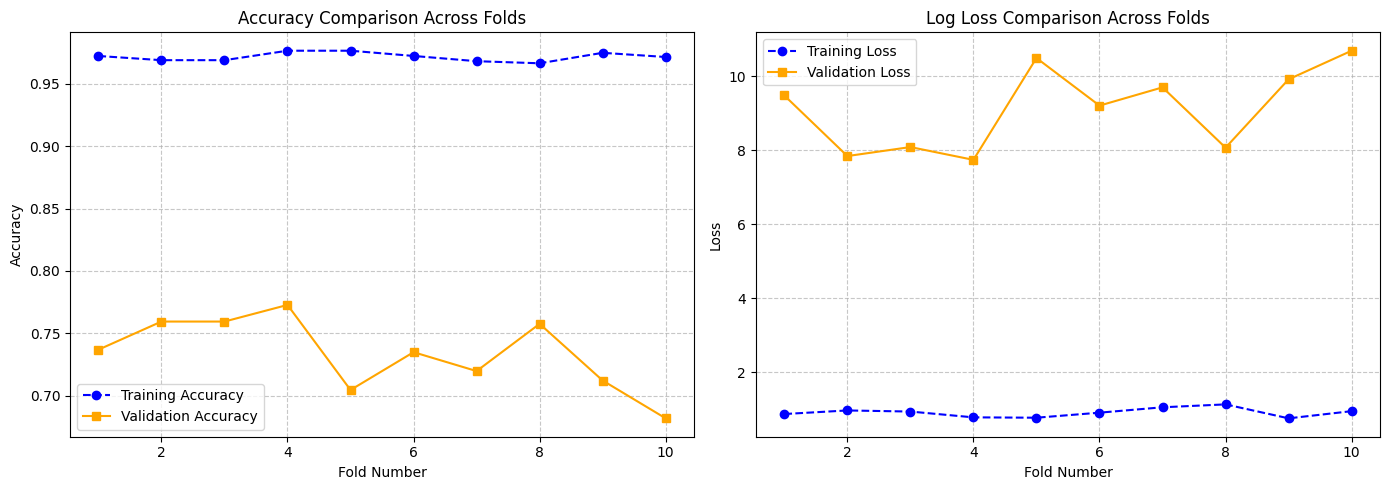

In [598]:
cv_scores = k_fold.evaluate(gnb_model)
TrainingValidationPlot(cv_scores).visualize()

In [599]:
evaluate_printer=EvaluatePrinter(gnb_model,X_train,y_train,X_test,y_test)
evaluate_printer.print()

accuracy = 0.6797583081570997
precision = 0.6742857142857143
recall = 0.7065868263473054
f1 = 0.6900584795321637
Compare Accuracy Evaluate:
Train Accuracy == Test Accuracy
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       164
           1       0.67      0.71      0.69       167

    accuracy                           0.68       331
   macro avg       0.68      0.68      0.68       331
weighted avg       0.68      0.68      0.68       331



In [601]:
random_forest=RandomForestTrain(X_train,y_train,params={'criterion': 'gini','max_depth': 20,'max_features': 'sqrt',
                                                    'min_samples_leaf': 1,'min_samples_split': 2,'n_estimators': 200})
random_forest_model=random_forest.train()

cross_validation=cross_validation_evaluate.evaluate(random_forest_model)
print(f"Cross-Validation Accuracy Scores: {cross_validation}")
print(f"Mean Accuracy Scores: {cross_validation.mean()}")

Cross-Validation Accuracy Scores: [0.84210526 0.83458647 0.81954887 0.84848485 0.86363636 0.78787879
 0.81060606 0.78787879 0.81060606 0.77272727]
Mean Accuracy Scores: 0.8178058783321942


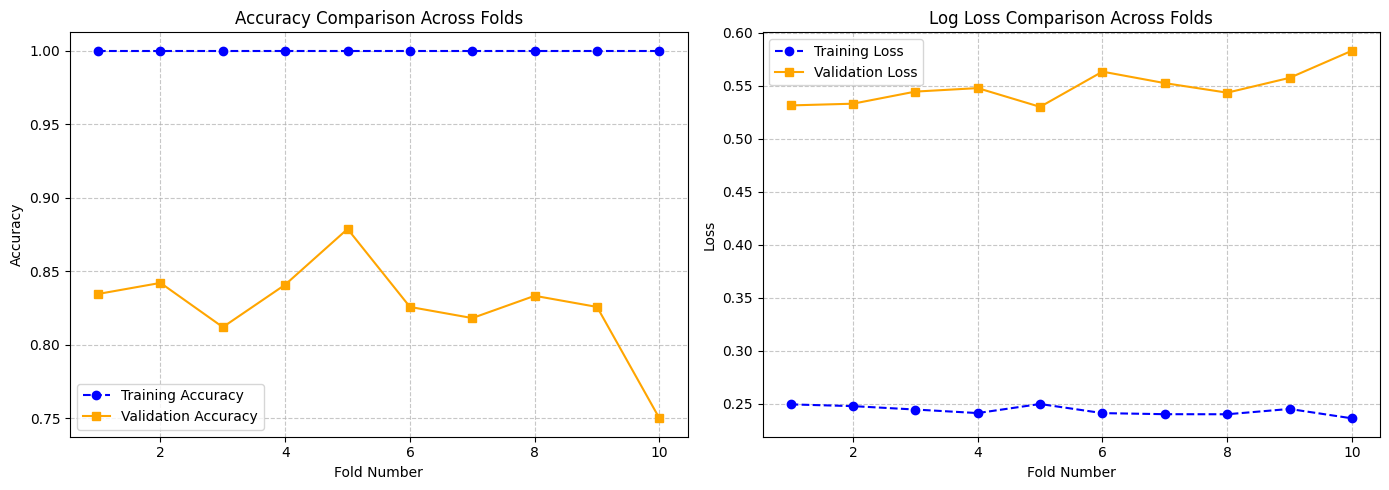

In [602]:
cv_scores = k_fold.evaluate(random_forest_model)
TrainingValidationPlot(cv_scores).visualize()

In [603]:
evaluate_printer=EvaluatePrinter(random_forest_model,X_train,y_train,X_test,y_test)
evaluate_printer.print()

accuracy = 0.851963746223565
precision = 0.8933333333333333
recall = 0.8023952095808383
f1 = 0.8454258675078864
Compare Accuracy Evaluate:
Train Accuracy == Test Accuracy
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       164
           1       0.89      0.80      0.85       167

    accuracy                           0.85       331
   macro avg       0.86      0.85      0.85       331
weighted avg       0.86      0.85      0.85       331



In [604]:
logistic=LogisticRegressionTrain(X_train,y_train,{"C":10,"penalty":'l2',"solver":'liblinear',
                                                        "class_weight":'balanced',"random_state":42,"max_iter":1000})
logistic_model=logistic.train()

cross_validation=cross_validation_evaluate_scale.evaluate(logistic_model)
print(f"Cross-Validation Accuracy Scores: {cross_validation}")
print(f"Mean Accuracy Scores: {cross_validation.mean()}")

Cross-Validation Accuracy Scores: [0.89473684 0.88721805 0.86466165 0.86363636 0.84848485 0.82575758
 0.84848485 0.87878788 0.84848485 0.81060606]
Mean Accuracy Scores: 0.8570858965595807


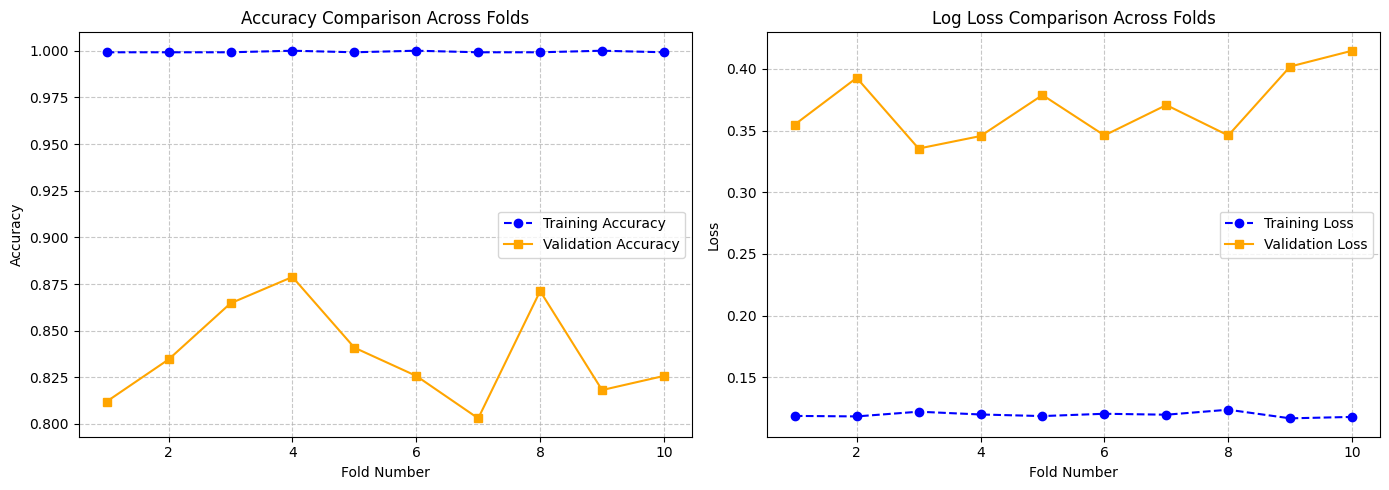

In [605]:
cv_scores = k_fold.evaluate(logistic_model)
TrainingValidationPlot(cv_scores).visualize()

In [606]:
evaluate_printer=EvaluatePrinter(logistic_model,X_train,y_train,X_test,y_test)
evaluate_printer.print()

accuracy = 0.8187311178247734
precision = 0.8022598870056498
recall = 0.8502994011976048
f1 = 0.8255813953488372
Compare Accuracy Evaluate:
Train Accuracy == Test Accuracy
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       164
           1       0.80      0.85      0.83       167

    accuracy                           0.82       331
   macro avg       0.82      0.82      0.82       331
weighted avg       0.82      0.82      0.82       331

